In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
#List of congresses



congresses = [str(i) for i in range(97, 115)]
congresses = ['0' + x if len(x) == 2 else x for x in congresses ]
congresses

['097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114']

In [3]:
#Mapping stem to words

mapping = {'treati': 'treaty', 'salari': 'salary', 'judici': 'judiciary', 'poverti': 'poverty', 'navi': 'navy', 'militari': 'military', 'regulatori': 'regulatory', 'duti': 'duty', 'treasuri': 'treasury', 'recoveri': 'recovery', 'armi': 'army', 'freedeliveri': 'freedelivery', 'busi': 'business', 'privaci': 'privacy', 'bankruptci:': 'bankruptcy', 'safeti': 'safety', 'bureaucraci': 'bureaucracy', 'selfsuffici': 'selfsufficy', 'alreadi': 'already', 'bankruptci': 'bankruptcy', 'monetari': 'monetary', 'simplifi': 'simplify', 'germani': 'germany', 'subsidiari': 'subsidiary', 'secondari': 'secondary', 'machineri': 'machinery', 'mandatori': 'mandatory', 'migratori': 'migratory', 'fisheri': 'fishery', 'equiti': 'equity', 'postsecondari': 'postsecondary', 'discriminatori': 'discriminatory', 'penalti': 'penalty', 'forestri': 'forestry', 'difficulti': 'difficulty', 'elementari': 'elementary', 'pariti': 'parity', 'secretari': 'secretary', 'slurri': 'slurry', 'dairi': 'dairy', 'duli': 'duly', 'daili': 'daily', 'antipoverti': 'antipoverty', 'liberti': 'liberty', 'laboratori': 'laboratory', 'judiciari': 'judiciary', 'wealthi': 'wealthy', 'entiti': 'entity', 'faculti': 'faculty', 'conspiraci': 'conspiracy', 'surgeri': 'surgery', 'countri': 'country', 'realiti': 'reality', 'everi': 'every', 'smallbusi': 'smallbusy', 'energi': 'energy', 'discretionari': 'discretionary', 'ssi': 'ssy', 'societi': 'society', 'communiti': 'community', 'compensatori': 'compensatory', 'prioriti': 'priority', 'properti': 'property', 'liquefi': 'liquefy', 'democraci': 'democracy', 'deputi': 'deputy', 'revolutionari': 'revolutionary', 'beneficiari': 'beneficiary', 'qualiti': 'quality', 'jewri': 'jewry', 'enemi': 'enemy', 'compulsori': 'compulsory',\
 'economi':'econom',
 'polici':'policy',
 'famili':'family',
 'lobbi':'lobby',
 'bodi':'body',
 'victori':'victory',
 'theori':'theor',
    'countri':'country',
    'healthi':'health',
    'needi':'need',
    'primari':'primary',
    'studi':'stud',
    'territori':'territor',
    'voluntari':'voluntar',
    'deliveri':'delivery',
    'scrutini':'scrutiny',
    'necessari':'necessary',
    'philosophi':'philosoph',
    'juri':'jury',
    'speedi':'speedy',
    'basi':'basic',
    'treasuri':'treasury',
    
}

In [4]:
## Loading congress keywords

keyword_file = './data/hein-daily/keywords.txt'
topic_keywords = {}
one_grams = set()
with open(keyword_file) as f:
    lines = f.readlines()[1:]
    for line in lines:
        topic, word = line.split('|')
        word = word.strip()
        if word in mapping:
            word = mapping[word]
                        
        topic_keywords[word] = topic.strip()
        one_grams.add(word)
    
len(topic_keywords),len(one_grams) 

(282, 282)

In [5]:
topic_keywords

{'alcohol': 'alcohol',
 'antisaloon': 'alcohol',
 'distil': 'alcohol',
 'liquor': 'alcohol',
 'malt': 'alcohol',
 'saloon': 'alcohol',
 'spirit': 'alcohol',
 'balanc': 'budget',
 'budget': 'budget',
 'debt': 'budget',
 'defici': 'budget',
 'expenditur': 'budget',
 'expens': 'budget',
 'revenu': 'budget',
 'spend': 'budget',
 'treasury': 'money',
 'agricultur': 'business',
 'banker': 'business',
 'bankruptcy': 'business',
 'business': 'business',
 'canal': 'business',
 'capit': 'business',
 'chief execut': 'business',
 'coal': 'business',
 'commerc': 'business',
 'commod': 'business',
 'compani': 'business',
 'credit': 'business',
 'electr': 'business',
 'enterpri': 'business',
 'farm': 'business',
 'financ': 'business',
 'fishermen': 'business',
 'gas': 'business',
 'industri': 'business',
 'leather': 'business',
 'loan': 'business',
 'manufactur': 'business',
 'mine': 'business',
 'oil': 'business',
 'owner': 'business',
 'patent': 'business',
 'petroleum': 'business',
 'plant': 'envi

In [6]:
one_grams

{'academ',
 'afghanistan',
 'african',
 'agenc',
 'agricultur',
 'aid',
 'alcohol',
 'alien',
 'antisaloon',
 'arm',
 'army',
 'asia',
 'atom',
 'attorney',
 'balanc',
 'ballot',
 'banker',
 'bankruptcy',
 'benefit',
 'bolivia',
 'bomb',
 'border',
 'britain',
 'buddhi',
 'budget',
 'bureau',
 'business',
 'campaign',
 'campus',
 'canada',
 'canal',
 'canyon',
 'capit',
 'care',
 'care reform',
 'cash',
 'cathol',
 'cell',
 'cheroke',
 'chief execut',
 'china',
 'chines',
 'choctaw',
 'christian',
 'citizen',
 'clerk',
 'climat',
 'coal',
 'coin',
 'cold war',
 'color',
 'combat',
 'commerc',
 'commod',
 'communism',
 'communist',
 'compani',
 'compens',
 'confeder',
 'conserv',
 'contam',
 'contra',
 'court',
 'coverag',
 'credit',
 'crim',
 'crime',
 'cuba',
 'dam',
 'debt',
 'defens',
 'defici',
 'depart',
 'detain',
 'discrimin',
 'distil',
 'dollar',
 'drug',
 'duty',
 'econom',
 'educ',
 'elect',
 'electr',
 'employ',
 'enlist',
 'enterpri',
 'environ',
 'equal',
 'eros',
 'estat

In [7]:
#Loading bigram keywords

bigram_file = './data/hein-daily/topic_phrases.txt'
bi_grams = set()
with open(bigram_file) as f:
    lines = f.readlines()[1:]
    for line in lines:
        topic, word = line.split('|')
        
        b1, b2 = word.split()
        if b1.strip() in mapping:
            b1 = mapping[b1.strip()]
        if b2.strip() in mapping:
            b2 = mapping[b2.strip()]
        
        
        topic_keywords[word.strip()] = topic.strip()
        topic_keywords[b1] = topic.strip()
        topic_keywords[b2] = topic.strip()
        bi_grams.add(word.strip())
        
len(bi_grams)

6929

In [8]:
bi_grams

{'agricultur adjust',
 'militari manpow',
 'assist local',
 'farm popul',
 'drug treatment',
 'everi taxpay',
 'elect held',
 'home state',
 'everi vote',
 'religi leader',
 'owner properti',
 'reelect campaign',
 'right abort',
 'manufactur unit',
 'govern assist',
 'receiv unemploy',
 'navajo indian',
 'trade area',
 'deliveri mail',
 'job creat',
 'court judg',
 'right regul',
 'economi futur',
 'valorem duti',
 'capit need',
 'impact health',
 'tax loss',
 'foundat govern',
 'execut agenc',
 'tax reduct',
 'bill health',
 'great war',
 'welfar roll',
 'one compani',
 'militari advis',
 'avail state',
 'tax individu',
 'remonet silver',
 'age discrimin',
 'defens agenc',
 'privat invest',
 'budget problem',
 'convent weapon',
 'union shop',
 'busi american',
 'care deliber',
 'card compani',
 'spend less',
 'prolifer weapon',
 'general welfar',
 'one job',
 'go feder',
 'health manpow',
 'stimulus plan',
 'preempt state',
 'hospit bed',
 'current medicar',
 'coule dam',
 'state anot

In [13]:
#Loading NYT timeseries data

ts_df = pd.read_csv('./data/SWOW_prediction/eval/time_series/nyt_ts_df.csv')

ts_df = ts_df.groupby(['words','year','property'])[['outputs_z','count']].mean().reset_index()
ts_df = ts_df.loc[ts_df['count'] >= 50]

In [11]:
#Loading sentiment data
sent_df = pd.read_csv('./data/SWOW_prediction/eval/nyt_sentiments.csv')


In [14]:
ts_df = ts_df.merge(sent_df, on=['words','year'], how='left')
ts_df.sample(10)

,words,year,property,outputs_z,count,sentiments
86448,citrus,1990,polarity,-0.161045,226.0,0.131881
454832,slaughter,2007,polarity,-1.623888,139.0,-0.036600
41870,baton,1997,polarity,0.308586,231.0,0.105308
297287,mall,1998,previous_link,-0.419821,1638.0,0.160177
429279,sanchez,1988,previous_link,1.569794,448.0,0.166013
477143,stranger,1993,previous_link,0.174812,758.0,0.015616
394735,rail,1999,previous_link,-1.229709,1344.0,0.081168
299328,maple,1995,polarity,0.040209,691.0,0.128482
17028,amplifier,2003,polarity,-0.249037,79.0,0.248005
209959,glaze,1994,previous_link,-1.098867,156.0,0.203191


In [16]:
ts_df[pd.isna(ts_df['sentiments'])]

,words,year,property,outputs_z,count,sentiments
836,abortion right,1987,polarity,0.753587,81.0,NaN
837,abortion right,1987,previous_link,1.502911,81.0,NaN
838,abortion right,1988,polarity,0.587494,88.0,NaN
839,abortion right,1988,previous_link,1.350125,88.0,NaN
840,abortion right,1989,polarity,0.877519,531.0,NaN
...,...,...,...,...,...,...
553743,young adult,2005,previous_link,-1.064528,219.0,NaN
553744,young adult,2006,polarity,1.348361,310.0,NaN
553745,young adult,2006,previous_link,-1.023512,310.0,NaN
553746,young adult,2007,polarity,1.383749,135.0,NaN


In [17]:
nyt_words = set(ts_df.words.unique())

In [18]:
#Selecting all onegrames that appear in the NYT data

final_words = set()
for word in nyt_words:
    if word in one_grams:
        final_words.add(word)
        continue
   

In [19]:
#Creating congress dataframe with columns "words", "year", "congress", "speech_count"

congress_list_rows = []

for congress in congresses:
    d = pickle.load(open(f'./data/hein-daily/word_counts_{congress}.pkl','rb'))
    word_count = d['word_counts']
    for w in word_count :
        w_clean = re.sub('[^A-Za-z0-9]+', '', w)
        if w_clean not in final_words:
            continue
        for year in word_count[w]:
            congress_list_rows.append({
                'words':w_clean,
                'year':year,
                'congress':congress,
                'speech_count': word_count[w][year],
                
        
            })

print(len(congress_list_rows))
congress_df = pd.DataFrame(congress_list_rows)
congress_df['words'] = congress_df['words'].apply(lambda x : re.sub('[^A-Za-z0-9]+', '', x)) #Removing punctuation from words
congress_df = congress_df.groupby(['words','year','congress']).speech_count.sum().reset_index()  #Grouping words

year_total = congress_df.groupby(['year','congress']).speech_count.sum().to_dict()  #Total number of words per congress, used for normalizing frequencies
congress_df['speech_count_norm'] = congress_df.apply(lambda x : x.speech_count/year_total[(x.year,x.congress)],axis=1)
congress_df


22355


,words,year,congress,speech_count,speech_count_norm
0,afghanistan,1981,097,640,0.002513
1,afghanistan,1982,097,575,0.002241
2,afghanistan,1983,098,593,0.002215
3,afghanistan,1984,098,426,0.001736
4,afghanistan,1985,099,703,0.002406
...,...,...,...,...,...
6366,worker,2013,112,26,0.013279
6367,worker,2013,113,2198,0.011509
6368,worker,2014,113,1780,0.010912
6369,worker,2015,114,1938,0.010288


In [20]:
words = congress_df.words.unique()
print(len(words))

174


In [21]:
len(congress_df)

6371

In [22]:
congress_df = congress_df.loc[(congress_df.words.isin(final_words)) & (congress_df.words.isin(nyt_words))] #Keeping only words that are in the NYT data

In [23]:
congress_df.sample(1)

,words,year,congress,speech_count,speech_count_norm
3408,lunch,2001,107,263,0.001059


In [24]:
joint_df = ts_df.set_index(['words','year']).\
join(congress_df.set_index(['words','year'])).reset_index()
joint_df = joint_df.loc[~pd.isna(joint_df.congress)] #Adding moral association scores to the congress keywords

In [25]:
joint_df.sample()

,words,year,property,outputs_z,count,sentiments,congress,speech_count,speech_count_norm
265941,job,2002,previous_link,-0.477534,21640.0,0.086126,107,5264.0,0.024991


In [26]:
rel_df = joint_df.loc[joint_df.property == 'previous_link'].drop('property',axis = 1) #Dataframe for moral relevance scores
pol_df = joint_df.loc[joint_df.property == 'polarity'].drop('property',axis = 1) #Dataframe for moral polarity scores

In [29]:
#Joining relevance and polarity dataframes

final_df = rel_df.set_index(['words','year','count','congress','speech_count','speech_count_norm','sentiments']).\
join(pol_df.set_index(['words','year','count','congress','speech_count','speech_count_norm','sentiments']),lsuffix = '_relevance',
    rsuffix = '_polarity').reset_index()

In [30]:
final_df.sample()

,words,year,count,congress,speech_count,speech_count_norm,sentiments,outputs_z_relevance,outputs_z_polarity
2335,plant,2006,6748.0,109,762.0,0.003306,0.108103,-1.037588,-0.595553


In [31]:
#Creating rate dataframe, comapring moral association scores between two consecutive years

new_df = final_df.copy(deep = True)
new_df['year'] = new_df['year'] + 1

rate_df = final_df.set_index(['words','year']).\
join(new_df.set_index(['words','year']),lsuffix = '_2',rsuffix = '_1').reset_index()
rate_df['previous_year'] = rate_df['year'] - 1

In [32]:
rate_df['congress_change'] = np.log(rate_df['speech_count_norm_2']) - np.log(rate_df['speech_count_norm_1'])
rate_df['polarity_change']= rate_df['outputs_z_polarity_2'] - rate_df['outputs_z_polarity_1']
rate_df['relevance_change'] = rate_df['outputs_z_relevance_2'] - rate_df['outputs_z_relevance_1']
rate_df['sentiment_change'] = rate_df['sentiments_2'] - rate_df['sentiments_1']
rate_df['year'] = rate_df['year'] - rate_df['year'].min() 

In [33]:
rate_df.sample(2)

,words,year,count_2,congress_2,speech_count_2,speech_count_norm_2,sentiments_2,outputs_z_relevance_2,outputs_z_polarity_2,count_1,...,speech_count_1,speech_count_norm_1,sentiments_1,outputs_z_relevance_1,outputs_z_polarity_1,previous_year,congress_change,polarity_change,relevance_change,sentiment_change
2832,spanish,10,2049.0,105,122.0,0.000495,0.115819,0.132468,0.116672,1818.0,...,130.0,0.000561,0.127559,0.195521,0.095590,1996,-0.125234,0.021082,-0.063053,-0.011740
1397,health,4,13394.0,102,6638.0,0.021804,0.069248,2.218590,1.387424,12327.0,...,6000.0,0.021488,0.062495,2.244087,1.304889,1990,0.014618,0.082534,-0.025497,0.006753


In [34]:
rate_df['congress_1']= rate_df['congress_1'].apply(lambda c :str(c))
rate_df['congress_2']= rate_df['congress_2'].apply(lambda c :str(c))

In [35]:
rate_df['speech_count_1_log'] = np.log(rate_df['speech_count_norm_1'])
rate_df['speech_count_2_log'] = np.log(rate_df['speech_count_norm_2'])

In [36]:
mean_value = rate_df['speech_count_1_log'].mean()
std_value =  rate_df['speech_count_1_log'].std()
rate_df['speech_count_1_log_norm'] = (rate_df['speech_count_1_log'] - mean_value) / std_value

In [37]:
based_model = smf.ols(formula = 'congress_change ~ year + speech_count_1_log+ C(words)',
                data = rate_df).fit()
base_r2 = based_model.rsquared
print(based_model.summary())

                            OLS Regression Results                            
Dep. Variable:        congress_change   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     5.321
Date:                Fri, 09 May 2025   Prob (F-statistic):           5.93e-86
Time:                        13:02:33   Log-Likelihood:                -1069.1
No. Observations:                3257   AIC:                             2486.
Df Residuals:                    3083   BIC:                             3546.
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

In [40]:
model = smf.ols(formula = 'congress_change ~ speech_count_1_log + relevance_change + polarity_change + sentiment_change + C(words)',
                data = rate_df).fit()
base_r2 = model.rsquared
rate_df['prediction'] = model.predict(rate_df)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        congress_change   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     5.824
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.02e-98
Time:                        13:04:41   Log-Likelihood:                -1029.1
No. Observations:                3257   AIC:                             2410.
Df Residuals:                    3081   BIC:                             3482.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

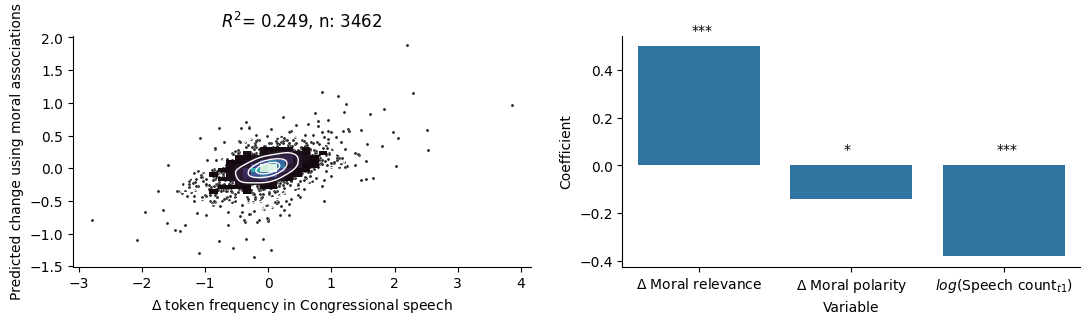

In [41]:
fig, axes = plt.subplots(1,2, figsize = (13, 3))
ax =axes[0]
sns.scatterplot(data = rate_df,x='congress_change', y='prediction',  s=5, color=".15",ax= ax)
sns.histplot(data = rate_df,x='congress_change', y='prediction', bins=50, pthresh=.1, cmap="mako",ax = ax)
sns.kdeplot(data = rate_df,x='congress_change', y='prediction',levels=5, color="w", linewidths=1,ax = ax)
ax.set_title(rf'$R^2$= {round(model.rsquared, 3)}, n: {len(rate_df)}')
ax.set_xlabel(rf'$\Delta$ token frequency in Congressional speech')
ax.set_ylabel('Predicted change using moral associations')
ax = axes[1]
coef_df = pd.DataFrame({
    'Variable': [r'$\Delta$ Moral relevance',r'$\Delta$ Moral polarity', r'$log$(Speech count$_{t1}$)'],
    'Coefficient': [model.params.relevance_change,model.params.polarity_change, model.params.speech_count_1_log],
    'Pvalue': [model.pvalues.relevance_change,model.pvalues.polarity_change, model.pvalues.speech_count_1_log],
      'CI Lower': [model.conf_int().loc['relevance_change'][0], model.conf_int().loc['polarity_change'][0], model.conf_int().loc['speech_count_1_log'][0]],
    'CI Upper': [model.conf_int().loc['relevance_change'][1], model.conf_int().loc['polarity_change'][1], model.conf_int().loc['speech_count_1_log'][1]]
})
# Calculate the error bars

coef_df['yerr_lower'] = coef_df['Coefficient'] - coef_df['CI Lower']
coef_df['yerr_upper'] = coef_df['CI Upper'] - coef_df['Coefficient']
coef_df['yerr'] = list(zip(coef_df['yerr_lower'], coef_df['yerr_upper']))

# Plot with error bars
sns.barplot(data=coef_df, x='Variable', y='Coefficient', ax=ax,)


# sns.barplot(data = coef_df,x ='Variable', y = 'Coefficient',ax = ax)
for i, row in coef_df.iterrows():
    pval = row['Pvalue']
    x = i - 0.05
    y = max(0.05, row['Coefficient'] + 0.05)
    astrik = ''
    if  0.01 <pval < 0.05:
        astrik = '*'
    elif pval < 0.01 and pval > 0.001:
        astrik = '**'
    else:
        astrik = '***'
    ax.text(x = x, y = y, s = astrik)

sns.despine()
# plt.savefig('notebooks/figs/nyt_congress_speech_prediction.pdf',dpi = 400, bbox_inches = 'tight')